In [27]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")
print(path)

C:\Users\carlo\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [29]:
df = pd.read_csv(f"{path}/airlines_flights_data.csv", low_memory=False)

In [30]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
df.shape

(300153, 12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [33]:
df.nunique()

index               300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Analysis of the dataset

## Distributions
### 1. Distribution for prices

<Axes: xlabel='price'>

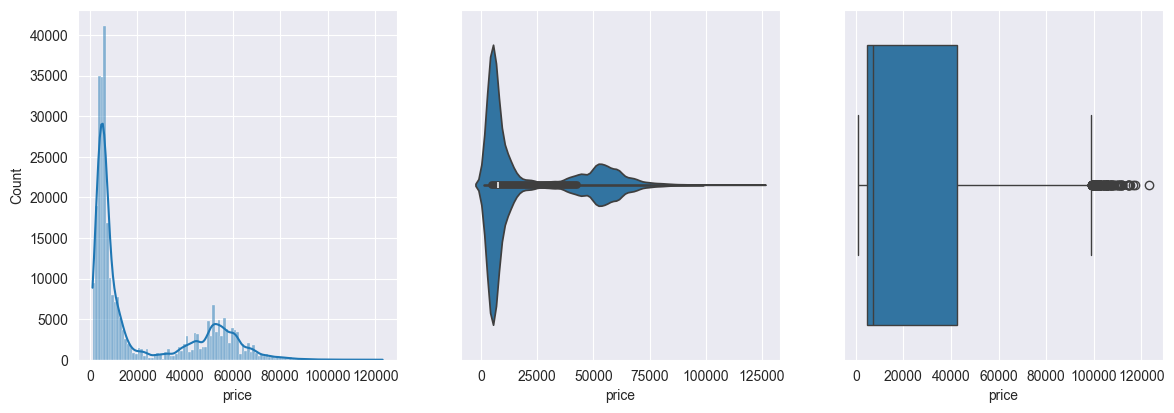

In [67]:
plt.figure(figsize=(14, 10))

dis = df['price']

plt.subplot(2, 3, 1)
sns.histplot(x=dis, kde=True)

plt.subplot(2, 3, 2)
sns.violinplot(x=dis)

plt.subplot(2, 3, 3)
sns.boxplot(x=dis)

### 2.Distribution for days left

<Axes: xlabel='days_left'>

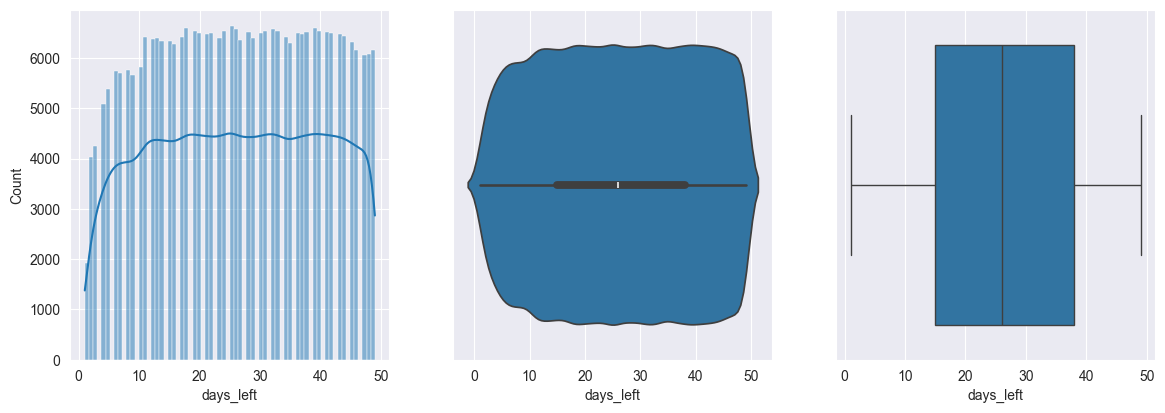

In [68]:
plt.figure(figsize=(14, 10))

dis = df['days_left']

plt.subplot(2, 3, 1)
sns.histplot(x=dis, kde=True)

plt.subplot(2, 3, 2)
sns.violinplot(x=dis)

plt.subplot(2, 3, 3)
sns.boxplot(x=dis)

### 3. Distribution for duration

<Axes: xlabel='duration'>

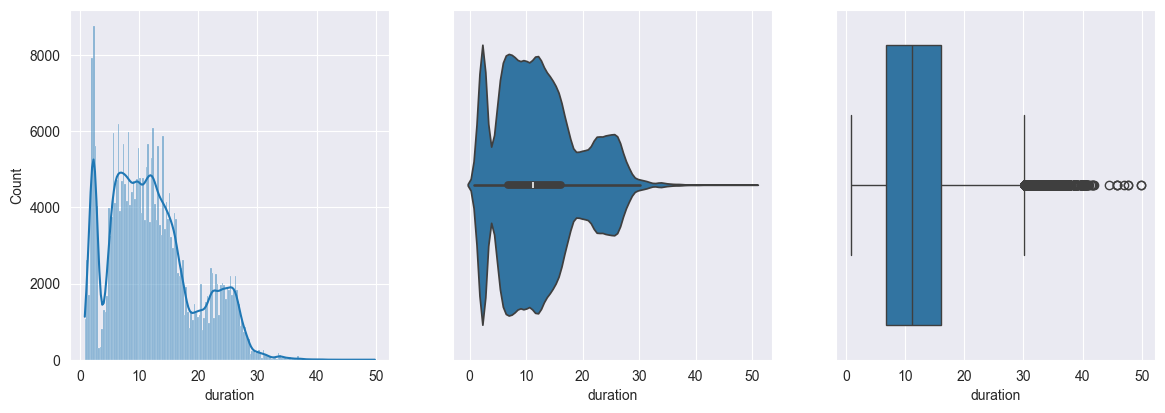

In [74]:
plt.figure(figsize=(14, 10))

dis = df['duration']

plt.subplot(2, 3, 1)
sns.histplot(x=dis, kde=True)

plt.subplot(2, 3, 2)
sns.violinplot(x=dis)

plt.subplot(2, 3, 3)
sns.boxplot(x=dis)

<Axes: xlabel='airline'>

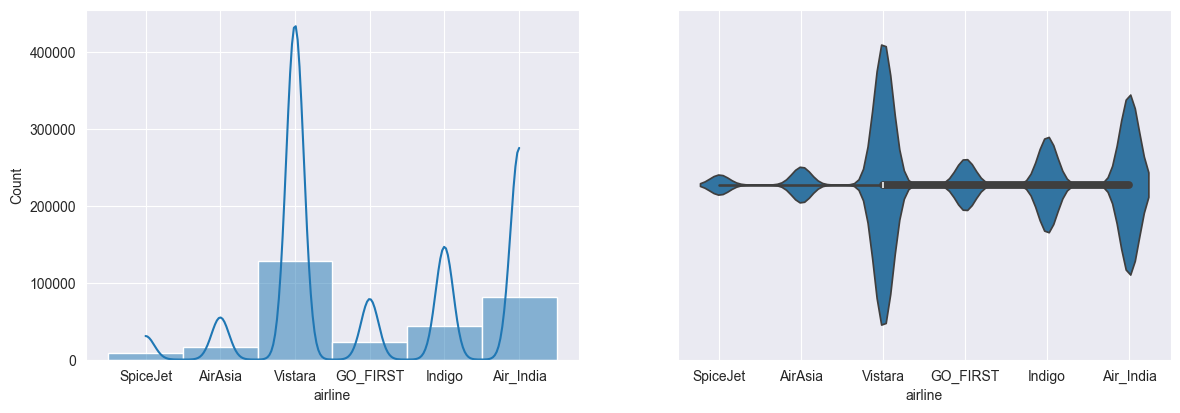

In [76]:
plt.figure(figsize=(14, 10))

dis = df['airline']

plt.subplot(2, 2, 1)
sns.histplot(x=dis, kde=True)

plt.subplot(2, 2, 2)
sns.violinplot(x=dis)


## Frequency tables

In [82]:

df.value_counts()

index   airline   flight   source_city  departure_time  stops  arrival_time   destination_city  class     duration  days_left  price
300152  Vistara   UK-822   Chennai      Morning         one    Evening        Hyderabad         Business  10.08     49         81585    1
0       SpiceJet  SG-8709  Delhi        Evening         zero   Night          Mumbai            Economy   2.17      1          5953     1
1       SpiceJet  SG-8157  Delhi        Early_Morning   zero   Morning        Mumbai            Economy   2.33      1          5953     1
2       AirAsia   I5-764   Delhi        Early_Morning   zero   Early_Morning  Mumbai            Economy   2.17      1          5956     1
3       Vistara   UK-995   Delhi        Morning         zero   Afternoon      Mumbai            Economy   2.25      1          5955     1
                                                                                                                                       ..
13      Indigo    6E-6202  Delhi       

In [83]:
df.value_counts(normalize=True)

index   airline   flight   source_city  departure_time  stops  arrival_time   destination_city  class     duration  days_left  price
300152  Vistara   UK-822   Chennai      Morning         one    Evening        Hyderabad         Business  10.08     49         81585    0.000003
0       SpiceJet  SG-8709  Delhi        Evening         zero   Night          Mumbai            Economy   2.17      1          5953     0.000003
1       SpiceJet  SG-8157  Delhi        Early_Morning   zero   Morning        Mumbai            Economy   2.33      1          5953     0.000003
2       AirAsia   I5-764   Delhi        Early_Morning   zero   Early_Morning  Mumbai            Economy   2.17      1          5956     0.000003
3       Vistara   UK-995   Delhi        Morning         zero   Afternoon      Mumbai            Economy   2.25      1          5955     0.000003
                                                                                                                                          ... 

<Axes: xlabel='source_city', ylabel='destination_city'>

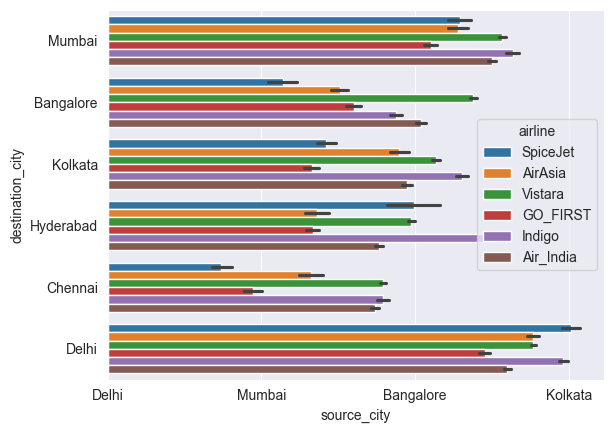

In [97]:
sns.barplot(df, x="source_city", y="destination_city", orient='h', hue="airline")

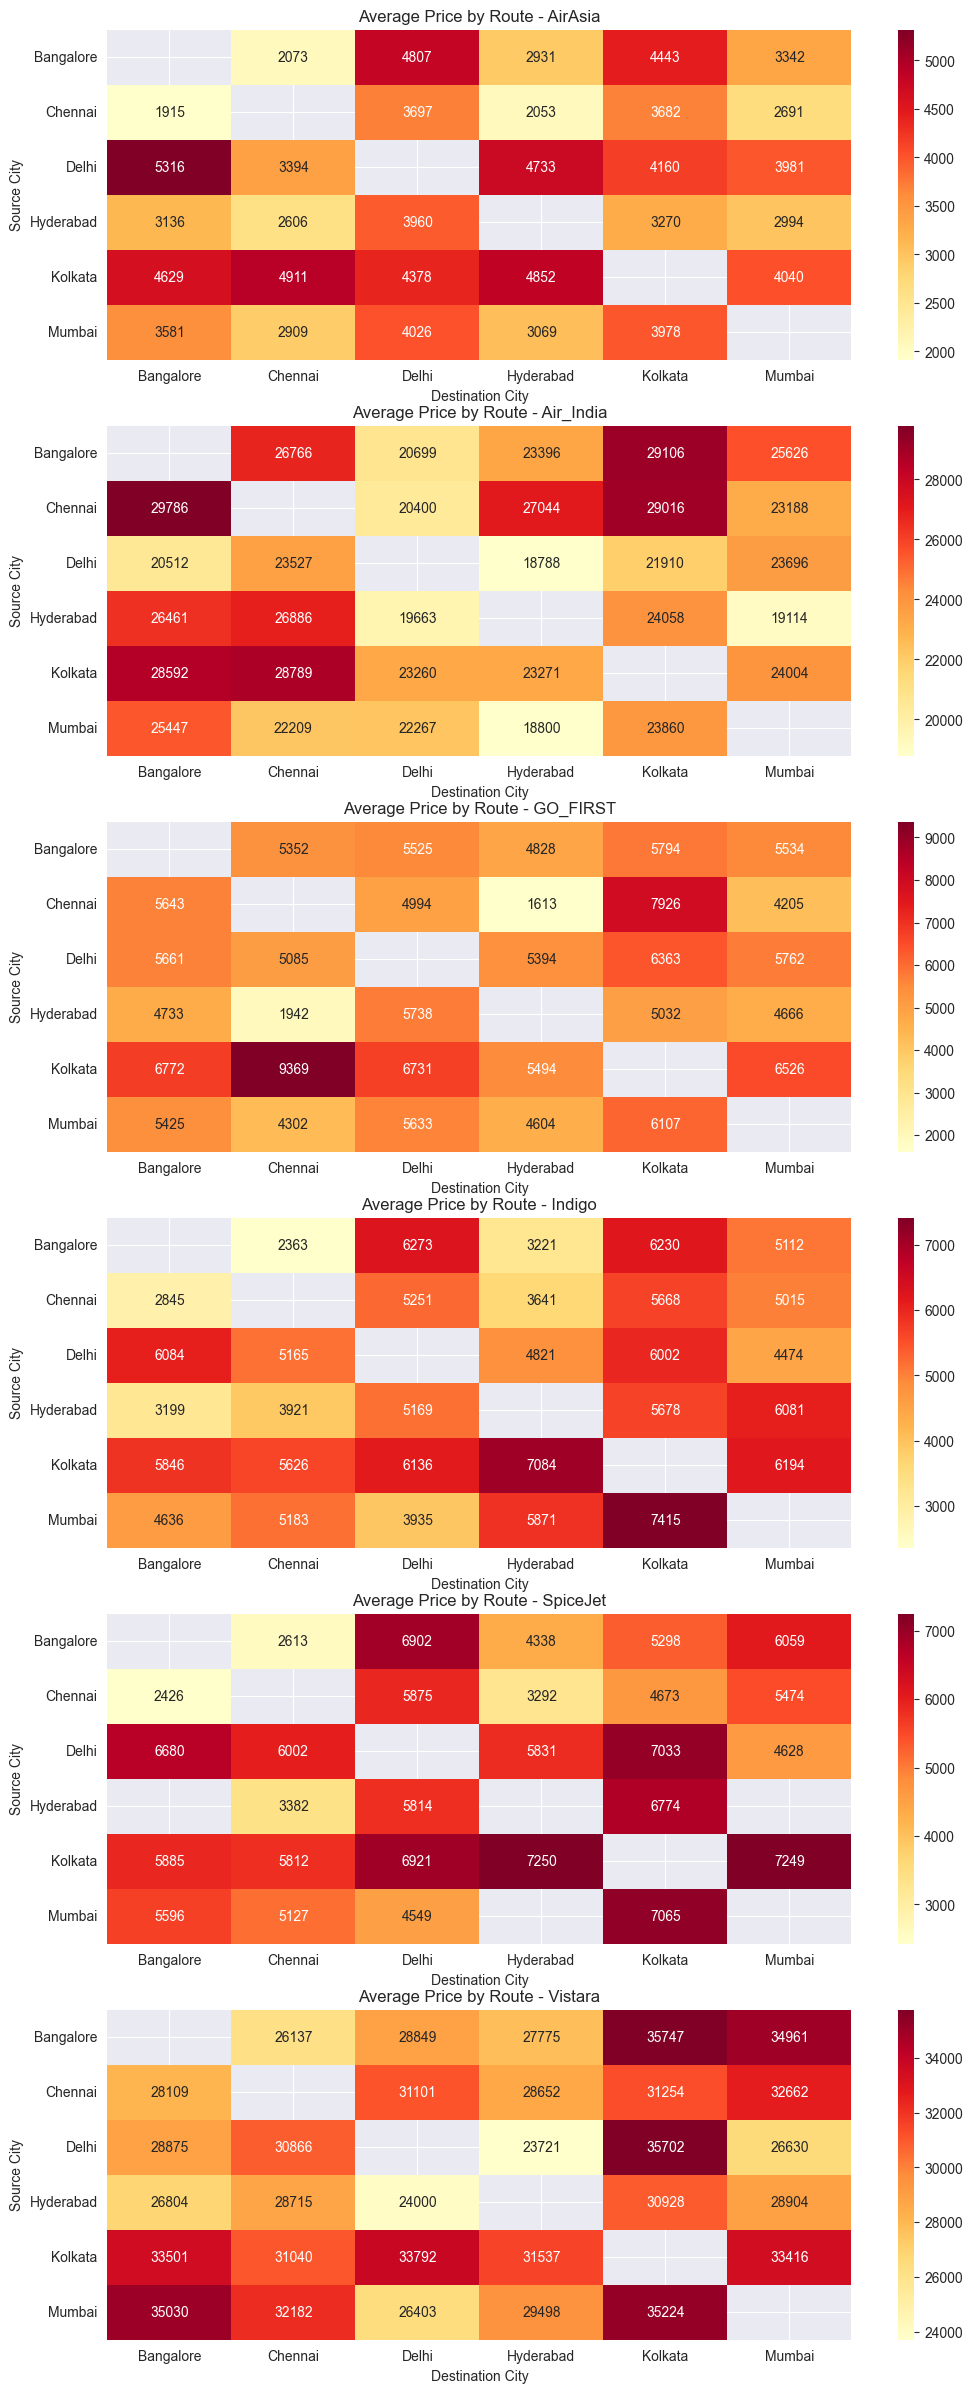

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [137]:
avg_prices = df.groupby(['airline', 'source_city', 'destination_city'])['price'].mean().reset_index()

airlines = avg_prices['airline'].unique()

fig, axes = plt.subplots(len(airlines), 1, figsize=(12, 5*len(airlines)))

if len(airlines) == 1:
    axes = [axes]

for i, airline in enumerate(airlines):
    plt.figure(figsize=(10, 10))
    airline_data = avg_prices[avg_prices['airline'] == airline]
    
    pivot_data = airline_data.pivot(index='source_city', 
                                   columns='destination_city', 
                                   values='price')
    
    sns.heatmap(pivot_data, 
                annot=True, 
                fmt=".0f", 
                cmap='YlOrRd',
                ax=axes[i] if len(airlines) > 1 else axes)
    
    axes[i].set_title(f'Average Price by Route - {airline}')
    axes[i].set_xlabel('Destination City')
    axes[i].set_ylabel('Source City')

plt.tight_layout()
plt.show()